<!--  HEllo-->

# Notebook for the ZTM Python course
This notebook is part of the ZTM Python developer course (Machine Learning with Python)

it represents my way of following the course along using my personal setup and code structure 

# Import the libraries

common libraries for data science an Machine learning (with the exception of scikit-learn which will be imported later and libraries for Deep leanrning (like TensorFlow or PyTorch))

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import helper
from helper import print_version_library, convert_wage

In [28]:
def reload(module):
    importlib.reload(module)

In [2]:
print_version_library(pd, np)

the version of pandas is 2.2.3
the version of numpy is 2.1.3
Finish !


## Unzip the data set

In [3]:
from pathlib import Path
cd = Path(".")
from zipfile import ZipFile
with ZipFile("FIFA23_official_data.csv.zip", "r") as unzip:
    unzip.extractall(cd)
print("File extracted")

File extracted


Import the data using Pandas

In [4]:
raw_data_df = pd.read_csv("FIFA23_official_data.csv")
raw_data_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [5]:
raw_data_df.shape

(17660, 29)

In [6]:
raw_data_df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169,25.037957
std,31487.892861,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264,19.154116
min,16.000000,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000,32.000000
max,271340.000000,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000


In [7]:
print(len(raw_data_df[raw_data_df["Age"]>40]))

13


## EDA

In [8]:
raw_data_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

In [9]:
df2 = pd.DataFrame(raw_data_df, columns=["Name","Wage","Value"])
df2.head()

,Name,Wage,Value
0,L. Goretzka,€115K,€91M
1,Bruno Fernandes,€190K,€78.5M
2,M. Acuña,€46K,€46.5M
3,K. De Bruyne,€350K,€107.5M
4,N. Barella,€110K,€89.5M


In [ ]:

# Apply the conversion function to both 'Wage' and 'Value' columns. The apply will loop over each rows of the column we speciy.
df2['Wage_int'] = df2['Wage'].apply(convert_wage)
df2['Value_int'] = df2['Value'].apply(convert_wage)


In [11]:
df2.head()

,Name,Wage,Value,Wage_int,Value_int
0,L. Goretzka,€115K,€91M,115000,91000000
1,Bruno Fernandes,€190K,€78.5M,190000,78500000
2,M. Acuña,€46K,€46.5M,46000,46500000
3,K. De Bruyne,€350K,€107.5M,350000,107500000
4,N. Barella,€110K,€89.5M,110000,89500000


In [12]:
df2["Difference"] = df2["Value_int"]-df2["Wage_int"]

In [13]:
df2.head()

,Name,Wage,Value,Wage_int,Value_int,Difference
0,L. Goretzka,€115K,€91M,115000,91000000,90885000
1,Bruno Fernandes,€190K,€78.5M,190000,78500000,78310000
2,M. Acuña,€46K,€46.5M,46000,46500000,46454000
3,K. De Bruyne,€350K,€107.5M,350000,107500000,107150000
4,N. Barella,€110K,€89.5M,110000,89500000,89390000


In [15]:
df2.sort_values("Difference",ascending=False)

,Name,Wage,Value,Wage_int,Value_int,Difference
75,K. Mbappé,€230K,€190.5M,230000,190500000,190270000
180,E. Haaland,€220K,€148M,220000,148000000,147780000
17,F. de Jong,€230K,€116.5M,230000,116500000,116270000
214,Pedri,€115K,€116M,115000,116000000,115885000
25,M. Salah,€270K,€115.5M,270000,115500000,115230000
...,...,...,...,...,...,...
8455,14 Índio,€20K,€0,20000,0,-20000
2031,14 J. Zanetti,€45K,€1K,45000,1000,-44000
199,R. Kent,€45K,€0,45000,0,-45000
1287,14 R. Giggs,€60K,€1K,60000,1000,-59000


In [29]:

reload(helper)


In [30]:
helper.test()

ok it worked


In [31]:
reload(helper)
helper.test2()

this works too !


In [32]:
import seaborn as sb

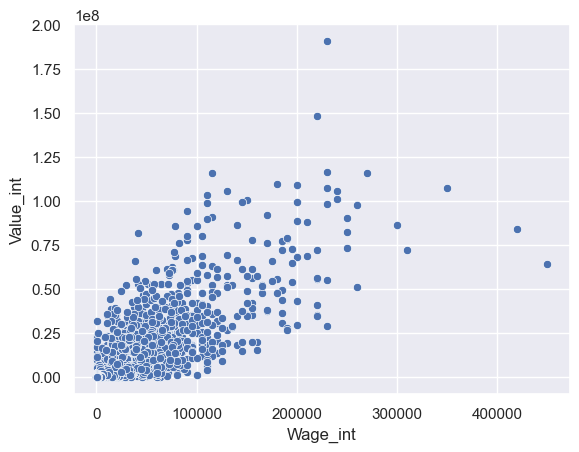

In [37]:

graph = sb.scatterplot(x="Wage_int", y="Value_int", data=df2)
plt.show()

<!-- fverv -->

graph

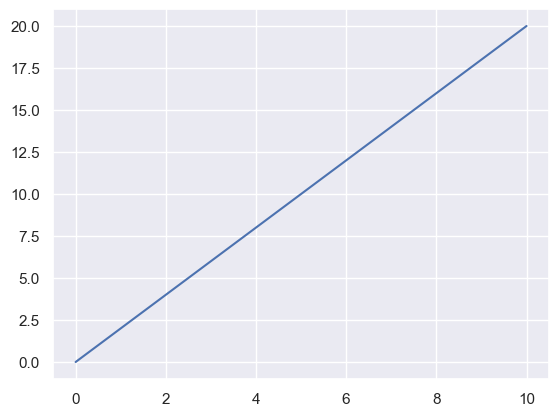

In [39]:
a1 = np.linspace(0,10,100)
y1 = 2*a1
plt.figure()
plt.plot(a1,y1)
plt.show()

In [41]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Set up hover tooltips
TOOLTIPS = [
    ("index", "$index"),
    ("(Wage_int, Value_int)", "(@Wage_int, @Value_int)"),
    ("Name", "@Name")
]

# Create hover tool
hover = HoverTool(tooltips=TOOLTIPS)

# Create a figure
p = figure(title="Wage vs Value", x_axis_label="Wage", y_axis_label="Value")

# Add scatter glyph with size as a parameter
p.scatter(x="Wage_int", y="Value_int", size=10, source=df2)

# Add the hover tool to the plot
p.add_tools(hover)
show(p)

## Iris data base
Here we are going to use a new data set: Iris data set for test ML 

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()


In [45]:
type(iris)

sklearn.utils._bunch.Bunch

In [49]:
iris.data.shape, iris.target.shape, iris.target_names.shape



((150, 4), (150,), (3,))

## Splitting in features and labels


In [52]:
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

In [53]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [127]:
target = iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Splitting into training and test test

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [120]:
len(X_train), len(X_test), len(y_train), len(y_test)

(105, 45, 105, 45)

## Build a model
https://scikit-learn.org/stable/modules/neighbors.html

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_neighbors=11)

In [122]:
knn.score

<bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=11)>

In [123]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [124]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [125]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
print(f"the accuracy of our model is: {accuracy*100:.2f}%")


the accuracy of our model is: 100.00%


## Predict on unseen data


In [129]:
sample = np.array([[3,5,4,2],[2,3,5,4]])
predictions = knn.predict(sample)

In [130]:
predictions

array([1, 2])

In [132]:
names_predicted = [str(target_names[p]) for p in predictions]
names_predicted

['versicolor', 'virginica']

## Model persistance

In [ ]:
from joblib import dump, load

model = dump(knn, "model.joblib") # binary file


In [134]:
loaded_model = load(filename="model.joblib")

In [135]:
loaded_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])